In [18]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

In [3]:
fmnist = keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

In [5]:
print(f'X_train :',X_train.shape)
print(f'X_test :',X_test.shape)
print(f'y_train :',y_train.shape)
print(f'y_test :',y_test.shape)

X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


In [6]:
#plt.imshow(X_train[0], cmap = 'gray')

In [7]:
#plt.imshow(y_train[0], cmap = 'gray')

In [8]:
#X_train[0]

In [9]:
#print(y_train[0])

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
#X_train[0]

In [12]:
#plt.imshow(X_train[0], cmap = 'gray')

# saved model initiation

In [13]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer= 'sgd',
    metrics=['accuracy']
             )

In [17]:
history = model.fit(X_train,y_train,epochs = 10,validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 8s 4ms/step - loss: 0.7672 - accuracy: 0.7479 - val_loss: 0.6766 - val_accuracy: 0.7371
Epoch 2/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.5086 - accuracy: 0.8247 - val_loss: 0.4746 - val_accuracy: 0.8343
Epoch 3/10
1594/1594 [==============================] - 12s 8ms/step - loss: 0.4609 - accuracy: 0.8392 - val_loss: 0.4764 - val_accuracy: 0.8321
Epoch 4/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4352 - accuracy: 0.8479 - val_loss: 0.4506 - val_accuracy: 0.8397
Epoch 5/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4140 - accuracy: 0.8553 - val_loss: 0.4236 - val_accuracy: 0.8522
Epoch 6/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3982 - accuracy: 0.8601 - val_loss: 0.4141 - val_accuracy: 0.8561
Epoch 7/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3856 - accuracy: 0.8637 - val_loss: 0.4164 - val_accuracy

# evaluating the model

In [19]:
# Get the model's predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision}')

# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')

# Calculate Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_mat}')

313/313 [==============================] - 1s 3ms/step
Precision: 0.8567874982327777
Recall: 0.8543000000000001
F1 Score: 0.8512514599448885
Confusion Matrix: 
[[832   3   8  66   5   2  65   0  18   1]
 [  2 962   1  26   3   0   3   0   3   0]
 [ 18   2 660  19 227   1  57   0  16   0]
 [ 20  13   5 904  28   1  22   0   7   0]
 [  0   2  49  50 855   0  36   0   8   0]
 [  0   1   0   0   0 935   0  46   3  15]
 [147   1  67  69 154   0 536   0  26   0]
 [  0   0   0   0   0  29   0 946   0  25]
 [  1   1   0   7   5   1   6   6 973   0]
 [  0   0   0   0   0  11   0  48   1 940]]


# saving the model

In [16]:
model.save("model0.h5")

C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the model

In [24]:
model0 = keras.models.load_model("model0.h5")

In [23]:
model0.layers

# Cloning approach

In [30]:
model0_cloned = keras.models.clone_model(model=model0)


In [31]:
model0_cloned.layers

# comparison 

In [37]:
model0.get_weights()[4][1]

array([ 0.14567111, -0.26933762,  0.10646103,  0.37275973,  0.01725256,
        0.1740728 , -0.3918374 ,  0.00599487,  0.01554619, -0.18219575],
      dtype=float32)

In [36]:
model0_cloned.get_weights()[4][1]

array([-0.15123501, -0.00623128,  0.03010079,  0.18817237, -0.09093732,
        0.07137704, -0.22097935,  0.15919381,  0.20632982,  0.00953621],
      dtype=float32)

We see that there is a difference between model weights

now we can modify the weights of the cloned model

how ?

set_weights method

# Again completing the approach

In [48]:
model0_cloned = tf.keras.models.clone_model(model0)

In [49]:
model0_cloned.set_weights(model0.get_weights())

comparison between weights!

In [51]:
model0_cloned.get_weights()[4][1]

array([ 0.14567111, -0.26933762,  0.10646103,  0.37275973,  0.01725256,
        0.1740728 , -0.3918374 ,  0.00599487,  0.01554619, -0.18219575],
      dtype=float32)

In [52]:
model0.get_weights()[4][1]

array([ 0.14567111, -0.26933762,  0.10646103,  0.37275973,  0.01725256,
        0.1740728 , -0.3918374 ,  0.00599487,  0.01554619, -0.18219575],
      dtype=float32)

we realize that they incorporate the same weights in certain layer

# now that we initialized the proper approach we can continue solving the problem which is using the saved model for a new problem 

the output layer of the saved model had 10 neurons and a softmax activation function but in the new case we are gonna have to define whether it is a boot or not in the fashion mnist using a sigmoid activation function

in other words we are supposed to modify the saved model in a proper way in order to fit it to the new problem which can be considered as a conversion of multiclass classification to binary classification

In [58]:
# as you can see the y train needs to become modified for our problem
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [59]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

but we only need the boots to be classified so that here is how we deal with it

In [61]:
y_train_new  = np.where(y_train==9,1,0)

In [62]:
y_train_new

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
y_train_new = y_train_new[:5000]
y_train_new.shape

(5000,)

In [67]:
np.sum(y_train_new)

506

In [68]:
X_train.shape

(60000, 28, 28)

In [72]:
X_train_new = X_train[:5000, : , :]

In [73]:
X_train_new.shape

(5000, 28, 28)

In [78]:
model0.get_weights()[-1]

array([ 0.01706175, -0.00407254,  0.10878251,  0.10854242, -0.17452562,
        0.26216096,  0.06546704,  0.01778083, -0.12462656, -0.27656975],
      dtype=float32)

In [79]:
model0_cloned.get_weights()[-1]

array([ 0.01706175, -0.00407254,  0.10878251,  0.10854242, -0.17452562,
        0.26216096,  0.06546704,  0.01778083, -0.12462656, -0.27656975],
      dtype=float32)

In [80]:
model0.layers

In [81]:
model0_cloned.layers

In [84]:
model0_cloned.add(keras.layers.Dense(1, activation='sigmoid'))

In [85]:
model0_cloned.layers

In [83]:
model0_cloned.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [86]:
history = model0_cloned.fit(X_train_new, y_train_new, epochs=10, validation_split=0.15)

Epoch 1/10
133/133 [==============================] - 3s 9ms/step - loss: 0.5289 - accuracy: 0.9021 - val_loss: 0.4785 - val_accuracy: 0.8800
Epoch 2/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4246 - accuracy: 0.9021 - val_loss: 0.4157 - val_accuracy: 0.8800
Epoch 3/10
133/133 [==============================] - 1s 6ms/step - loss: 0.3736 - accuracy: 0.9021 - val_loss: 0.3850 - val_accuracy: 0.8800
Epoch 4/10
133/133 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.9021 - val_loss: 0.3678 - val_accuracy: 0.8800
Epoch 5/10
133/133 [==============================] - 1s 5ms/step - loss: 0.3267 - accuracy: 0.9021 - val_loss: 0.3503 - val_accuracy: 0.8800
Epoch 6/10
133/133 [==============================] - 1s 5ms/step - loss: 0.3126 - accuracy: 0.9021 - val_loss: 0.3433 - val_accuracy: 0.8800
Epoch 7/10
133/133 [==============================] - 1s 5ms/step - loss: 0.3054 - accuracy: 0.9021 - val_loss: 0.3392 - val_accuracy: 0.8800
Epoch 

# Transfered model evaluation

In [89]:
y_test_new  = np.where(y_test==9,1,0)

In [91]:
# Get the model's predictions
y_pred_probs = model0_cloned.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_probs]

# Calculate Precision
precision = precision_score(y_test_new, y_pred, average='binary', zero_division=1)
print(f'Precision: {precision}')

# Calculate Recall
recall = recall_score(y_test_new, y_pred, average='binary')
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(y_test_new, y_pred, average='binary')
print(f'F1 Score: {f1}')

# Calculate Confusion Matrix
conf_mat = confusion_matrix(y_test_new, y_pred)
print(f'Confusion Matrix: \n{conf_mat}')


313/313 [==============================] - 1s 3ms/step
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix: 
[[9000    0]
 [1000    0]]


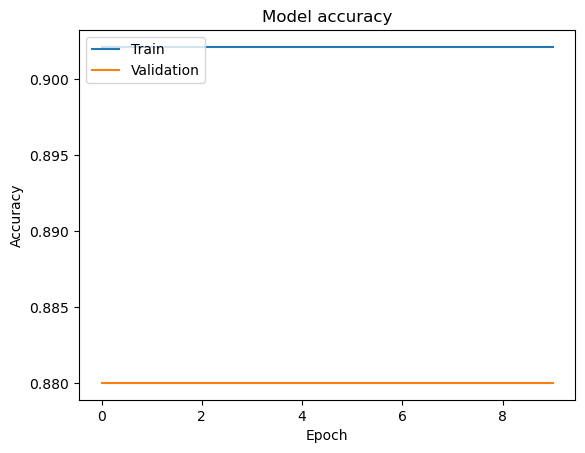

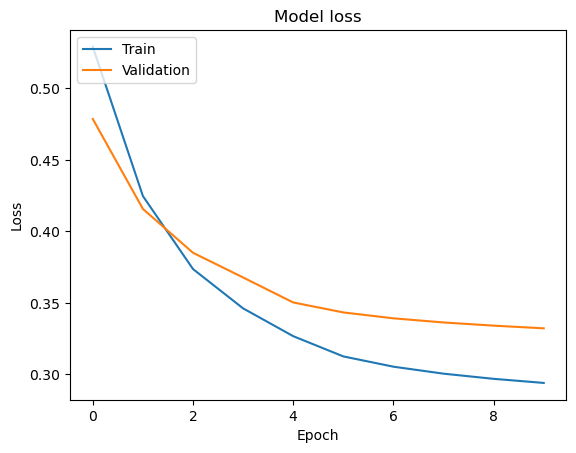

In [92]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [74]:
model1.summary()

NameError: name 'model1' is not defined

In [19]:
model1.layers[3].trainable

True

In [20]:
model1 = keras.models.Sequential(model0.layers[:-1])
model1.add(keras.layers.Dense(50,activation='selu'))
model1.add(keras.layers.Dense(10,activation='softmax'))

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_3 (Dense)             (None, 50)                3800      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 90385 (353.07 KB)
Trainable params: 90385 (353.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
86075-86835

-760

In [29]:
for layer in model1.layers[:-1]:
    layer.trainable = True
    print(layer.trainable)

True
True
True
True
